# Project Overview

Air pollution is a major environmental challenge affecting public health and quality of life, especially in highly urbanized regions like Delhi. The Air Quality Index (AQI), defined by the Central Pollution Control Board (CPCB), provides a standardized way to communicate pollution severity and associated health risks.

In this project, a **machine learning–based AQI analysis system** is developed using real-world air pollutant concentrations and meteorological parameters. The project is divided into **two main parts**, each addressing a different real-world requirement in air quality monitoring and prediction.

---

## Part A — AQI Estimation (Same-Hour AQI Prediction)

The first part of the project focuses on **estimating the AQI directly from pollutant concentrations** using machine learning, without applying explicit CPCB formula-based calculations.

This part is required because:
- It enables AQI estimation directly from raw pollutant values  
- It allows real-time AQI prediction using data-driven learning  
- It captures complex nonlinear relationships between pollutants and AQI  

**Output of Part A:**
- Predicted AQI value  
- CPCB-based AQI category  

---

## Part B — AQI Forecasting (Next-Hour AQI Prediction)

The second part of the project extends the system into **time-series forecasting**, where the goal is to predict the **AQI of the next hour** using historical pollution data, meteorological features, and temporal lag variables.

This part is required because:
- CPCB does not provide short-term AQI forecasting  
- Forecasting helps in early health warnings and pollution preparedness  
- Time-series ML captures hourly trends, momentum, and daily pollution cycles  

**Output of Part B:**
- Next-hour predicted AQI  
- Predicted AQI category  
- Comparison with actual next-hour AQI for validation  

---

## Why the Project is Divided into Two Parts

| Part | Purpose |
|------|---------|
| **Part A – AQI Estimation** | Predict current AQI from pollutant values |
| **Part B – AQI Forecasting** | Predict AQI for the next hour (future) |

Together, these two parts form a **complete AQI prediction system** that supports both **real-time estimation** and **short-term forecasting**.

---

## Need of This Project

Air quality monitoring is essential for protecting public health and supporting environmental decision-making. Although CPCB provides formula-based AQI values, these systems:

- Do not provide predictive intelligence  
- Cannot estimate AQI directly from incomplete pollutant inputs using learned patterns  
- Do not support short-term pollution forecasting  

A machine learning–based system is therefore needed to:
- Provide real-time AQI estimation using data-driven learning  
- Forecast short-term AQI for early warnings  
- Assist in pollution control planning and health risk prevention  

---

## Use of Machine Learning in This Project

Machine learning is used in this project to:
- Learn the nonlinear relationship between pollutants, weather, and AQI  
- Estimate AQI without relying on fixed CPCB arithmetic formulas  
- Perform time-series forecasting using lag-based memory features  
- Generalize pollution patterns from historical data  
- Improve prediction accuracy compared to naive baseline methods  

---

## Scope of This Project

This project is applicable for:
- Urban air quality monitoring  
- Health risk awareness systems  
- Smart city pollution analytics  
- Traffic and industrial emission impact assessment  
- Short-term pollution forecasting and early warning systems  

The current implementation is limited to:
- Three Delhi monitoring stations  
- Short-term next-hour forecasting  
- Historical offline dataset  

Future extensions may include:
- Multi-city AQI forecasting  
- Real-time API integration  
- Deep learning–based sequence models  
- Web and mobile dashboard deployment  


# PART A — AQI ESTIMATION USING MACHINE LEARNING (CURRENT / SAME-HOUR AQI)  
(Delhi)

In this section, a machine learning–based AQI estimation model is developed that predicts the **current AQI directly from pollutant concentrations and meteorological parameters**, without using CPCB’s fixed breakpoint calculation formulas.

The estimation model learns the nonlinear relationship between multiple air pollutants, weather conditions, and AQI values using historical environmental data. This allows AQI to be estimated even when direct rule-based computation is not applied.

The predicted AQI values are further mapped into **official CPCB air quality categories** for real-world interpretation and health impact analysis.

---

# Importing Required Libraries
In this step, all the necessary Python libraries required for data handling, visualization, machine learning, and evaluation are imported.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Air Quality Dataset
The dataset is loaded from a CSV file containing air pollutant concentrations and meteorological parameters.


In [2]:
df = pd.read_csv('Delhi_3Stations_With_AQI_CLEAN.csv')
df.head()

,Unnamed: 0,PM2.5,year,month,day,hour,PM10,AT,BP,SR,...,PM10_sub,NO2_sub,SO2_sub,CO_sub,O3_sub,NH3_sub,AQI_Value,AQI_Category,Expected_Category,Recomputed_AQI
0,0,77.0,2018,6,1,0,274.0,34.51,975.17,2.00,...,224.000000,29.2000,13.6625,26.5,98.13,10.750,224.000000,Poor,Poor,224.000000
1,1,75.0,2018,6,1,1,237.0,34.05,976.08,2.00,...,191.362416,27.1375,11.8500,25.5,97.80,11.955,191.362416,Moderate,Moderate,191.362416
2,2,81.0,2018,6,1,2,219.0,33.12,991.25,2.00,...,179.402685,14.8750,2.1000,6.0,46.27,2.660,179.402685,Moderate,Moderate,179.402685
3,3,70.0,2018,6,1,3,217.0,32.54,998.50,2.00,...,178.073825,13.3750,3.7125,15.0,35.88,3.360,178.073825,Moderate,Moderate,178.073825
4,4,74.0,2018,6,1,4,226.0,31.93,997.90,2.08,...,184.053691,40.6125,3.4125,19.5,26.55,2.120,184.053691,Moderate,Moderate,184.053691


In [7]:
df.shape

(35114, 33)

# Description of Dataset Columns

The dataset contains air pollutant measurements, meteorological parameters, monitoring station details, and computed AQI-related values. Each column represents the following:

### Time and Index Features
- **Unnamed: 0** – Auto-generated index column from the dataset
- **year** – Year of observation
- **month** – Month of observation
- **day** – Day of observation
- **hour** – Hour of observation (24-hour format)

### Air Pollutant Concentrations (Input Features)
- **PM2.5** – Fine particulate matter concentration (µg/m³)
- **PM10** – Coarse particulate matter concentration (µg/m³)
- **NO** – Nitric Oxide concentration (µg/m³)
- **NO2** – Nitrogen Dioxide concentration (µg/m³)
- **NOx** – Oxides of nitrogen concentration (µg/m³)
- **SO2** – Sulphur Dioxide concentration (µg/m³)
- **Ozone (O₃)** – Ground-level ozone concentration (µg/m³)
- **CO** – Carbon Monoxide concentration (mg/m³)
- **Benzene** – Benzene concentration (µg/m³)
- **NH3** – Ammonia concentration (µg/m³)

### Meteorological Parameters
- **AT** – Ambient Temperature (°C)
- **BP** – Barometric Pressure
- **SR** – Solar Radiation
- **RH** – Relative Humidity (%)
- **WS** – Wind Speed (m/s)
- **WD** – Wind Direction (degrees)

### Station Information
- **Station** – Name of the air quality monitoring station

### CPCB Sub-Index Features (Derived)
These represent pollutant-wise AQI sub-indices calculated using CPCB formulas:
- **PM25_sub**
- **PM10_sub**
- **NO2_sub**
- **SO2_sub**
- **CO_sub**
- **O3_sub**
- **NH3_sub**

### Target and Label Columns
- **AQI_Value** – Final AQI value calculated from the maximum of pollutant sub-indices (Target Variable)
- **AQI_Category** – Official CPCB AQI category label
- **Expected_Category** – Validated AQI category based on calculated AQI
- **Recomputed_AQI** – AQI value recalculated after preprocessing and verification



# Feature and Column Analysis
This step identifies all available columns and verifies the relevant features for AQI prediction.


In [3]:
df.columns

Index(['Unnamed: 0', 'PM2.5', 'year', 'month', 'day', 'hour', 'PM10', 'AT',
       'BP', 'SR', 'RH', 'WS', 'WD', 'NO', 'NO2', 'SO2', 'Ozone', 'CO',
       'Benzene', 'NH3', 'NOx', 'Station', 'PM25_sub', 'PM10_sub', 'NO2_sub',
       'SO2_sub', 'CO_sub', 'O3_sub', 'NH3_sub', 'AQI_Value', 'AQI_Category',
       'Expected_Category', 'Recomputed_AQI'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35114 entries, 0 to 35113
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35114 non-null  int64  
 1   PM2.5              35114 non-null  float64
 2   year               35114 non-null  int64  
 3   month              35114 non-null  int64  
 4   day                35114 non-null  int64  
 5   hour               35114 non-null  int64  
 6   PM10               35114 non-null  float64
 7   AT                 35114 non-null  float64
 8   BP                 35114 non-null  float64
 9   SR                 35114 non-null  float64
 10  RH                 35114 non-null  float64
 11  WS                 35114 non-null  float64
 12  WD                 35114 non-null  float64
 13  NO                 35114 non-null  float64
 14  NO2                35114 non-null  float64
 15  SO2                35114 non-null  float64
 16  Ozone              351

In [5]:
df.describe()

,Unnamed: 0,PM2.5,year,month,day,hour,PM10,AT,BP,SR,...,NOx,PM25_sub,PM10_sub,NO2_sub,SO2_sub,CO_sub,O3_sub,NH3_sub,AQI_Value,Recomputed_AQI
count,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,...,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000
mean,5851.833343,95.237419,2018.561201,6.774620,15.707980,11.494788,234.446068,26.878254,981.928851,121.883348,...,46.301523,162.621831,192.943146,45.469618,20.169738,56.581618,33.723459,8.349123,214.588894,214.588894
std,3378.894343,98.694903,0.496247,3.065701,8.810326,6.921116,171.972850,8.125017,25.501441,182.384742,...,57.347490,135.659741,119.757265,31.539807,12.690890,36.386938,42.359433,3.955910,128.115791,128.115791
min,0.000000,0.250000,2018.000000,1.000000,1.000000,0.000000,3.000000,4.300000,702.500000,0.300000,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,14.500000,14.500000
25%,2926.000000,34.750000,2018.000000,5.000000,8.000000,5.000000,111.500000,21.150000,975.855000,4.180000,...,14.150000,56.068966,107.312080,21.900000,12.187500,34.000000,5.750000,5.845000,110.966443,110.966443
50%,5852.000000,59.500000,2019.000000,7.000000,16.000000,11.000000,189.750000,28.350000,982.730000,14.990000,...,24.620000,97.465517,159.469799,36.787500,17.575000,50.000000,15.820000,7.530000,174.087248,174.087248
75%,8778.000000,118.000000,2019.000000,9.000000,23.000000,17.000000,309.500000,32.480000,990.300000,177.450000,...,51.950000,289.758621,258.500000,62.207179,25.150000,76.588889,45.780000,10.144567,321.121670,321.121670
max,11704.000000,964.000000,2019.000000,12.000000,31.000000,23.000000,998.000000,48.200000,1094.250000,901.150000,...,499.500000,500.000000,499.652021,271.550000,137.216120,200.000000,279.184615,34.725000,500.000000,500.000000


# Handling Missing Values
Missing values in pollutant concentrations and meteorological data are handled to ensure model accuracy.


In [6]:
df.isnull().sum()

Unnamed: 0           0
PM2.5                0
year                 0
month                0
day                  0
hour                 0
PM10                 0
AT                   0
BP                   0
SR                   0
RH                   0
WS                   0
WD                   0
NO                   0
NO2                  0
SO2                  0
Ozone                0
CO                   0
Benzene              0
NH3                  0
NOx                  0
Station              0
PM25_sub             0
PM10_sub             0
NO2_sub              0
SO2_sub              0
CO_sub               0
O3_sub               0
NH3_sub              0
AQI_Value            0
AQI_Category         0
Expected_Category    0
Recomputed_AQI       0
dtype: int64

# Dropping Irrelevant Columns
Columns not required for AQI prediction such as station names, redundant indices, and precomputed sub-indices are removed.


In [8]:
drop_cols = [
    "Unnamed: 0",
    "year", "month", "day", "hour",
    "BP", "SR", "WD",
    "NO", "NOx", "Benzene",
    "Station",
    "PM25_sub", "PM10_sub", "NO2_sub",
    "SO2_sub", "CO_sub", "O3_sub", "NH3_sub",
    "AQI_Category", "Expected_Category", "Recomputed_AQI"
]

df_model = df.drop(columns=drop_cols)

print("Final shape:", df_model.shape)
df_model.head()


Final shape: (35114, 11)


,PM2.5,PM10,AT,RH,WS,NO2,SO2,Ozone,CO,NH3,AQI_Value
0,77.0,274.0,34.51,62.17,7.42,23.36,10.93,98.13,0.53,43.00,224.000000
1,75.0,237.0,34.05,62.33,7.43,21.71,9.48,97.80,0.51,47.82,191.362416
2,81.0,219.0,33.12,65.00,7.43,11.90,1.68,46.27,0.12,10.64,179.402685
3,70.0,217.0,32.54,66.92,7.42,10.70,2.97,35.88,0.30,13.44,178.073825
4,74.0,226.0,31.93,69.83,7.41,32.49,2.73,26.55,0.39,8.48,184.053691


# Outlier Detection (Before Capping)
Statistical methods such as IQR and boxplots are used to identify extreme values that may skew model performance.


In [9]:
num_cols = [
    "PM2.5", "PM10", "NO2", "SO2", "CO",
    "Ozone", "NH3", "AT", "RH", "WS", "AQI_Value"
]

df_num = df_model[num_cols]
df_num.describe()


,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS,AQI_Value
count,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000
mean,95.237419,234.446068,37.454365,16.253716,1.424056,32.926126,33.396490,26.878254,64.194880,1.451845,214.588894
std,98.694903,171.972850,25.902059,10.433056,1.209894,38.193612,15.823641,8.125017,24.600792,2.583711,128.115791
min,0.250000,3.000000,0.100000,0.100000,0.000000,0.100000,0.100000,4.300000,0.100000,0.100000,14.500000
25%,34.750000,111.500000,18.150000,9.780000,0.780000,5.870000,23.380000,21.150000,45.000000,0.530000,110.966443
50%,59.500000,189.750000,30.330000,14.100000,1.080000,16.250000,30.120000,28.350000,66.880000,0.900000,174.087248
75%,118.000000,309.500000,50.280000,20.180000,1.600000,47.057500,40.578270,32.480000,84.700000,1.350000,321.121670
max,964.000000,998.000000,251.550000,190.380000,10.000000,199.800000,138.900000,48.200000,99.450000,47.470000,500.000000


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


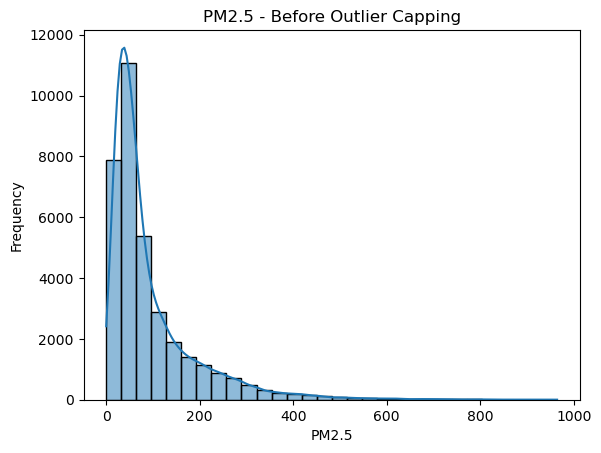

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


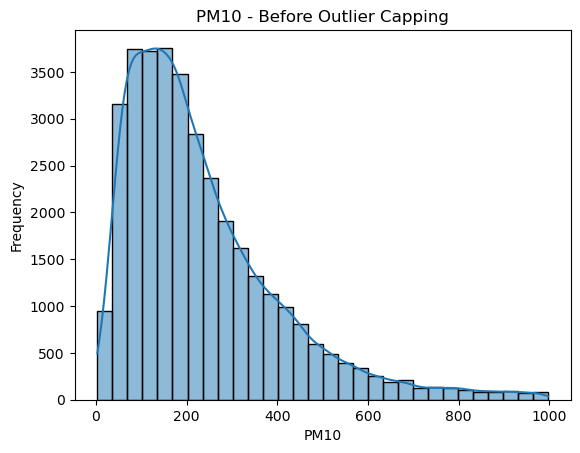

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


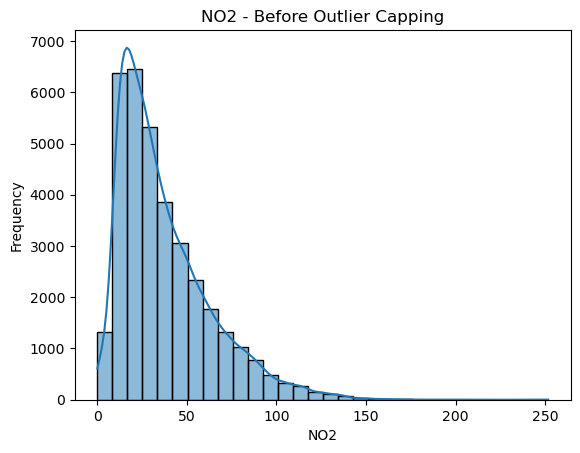

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


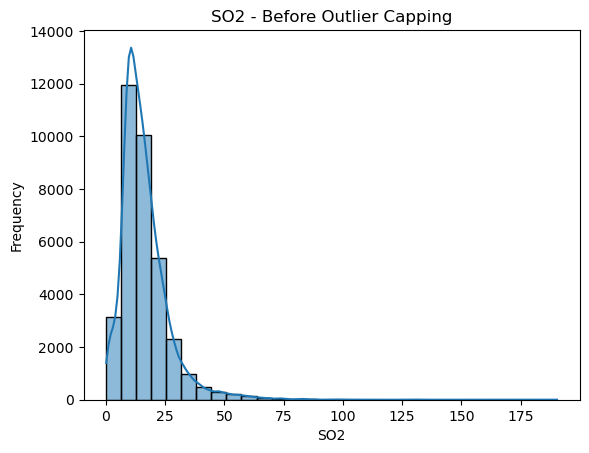

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


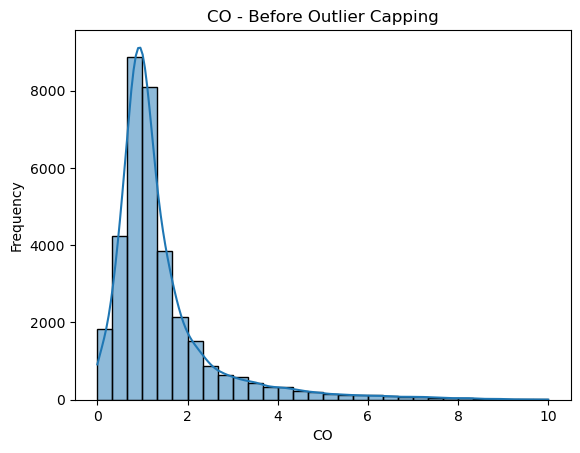

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


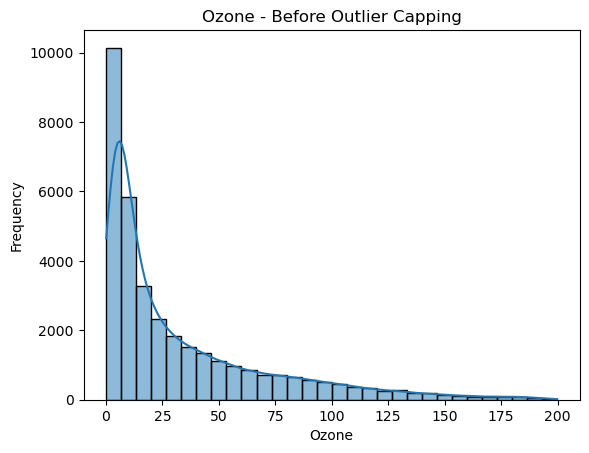

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


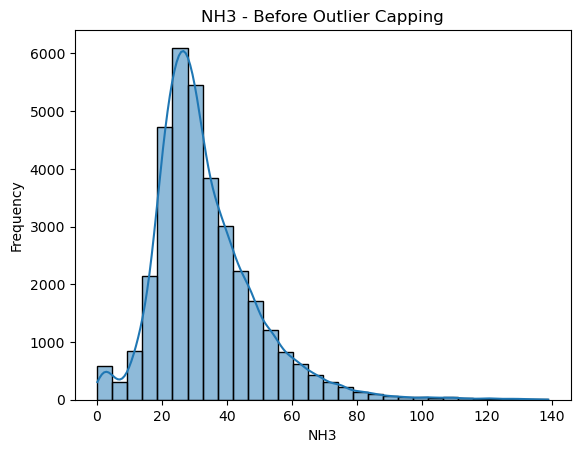

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


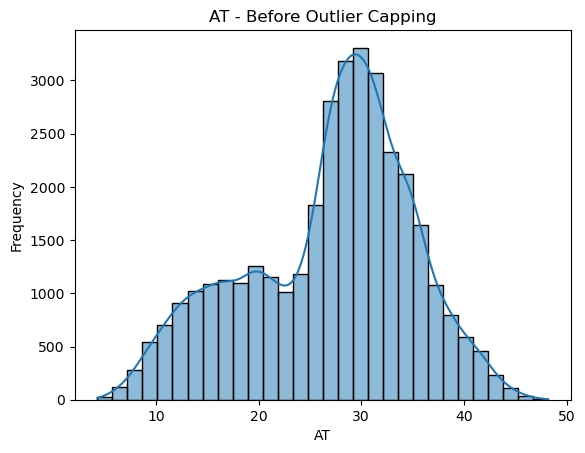

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


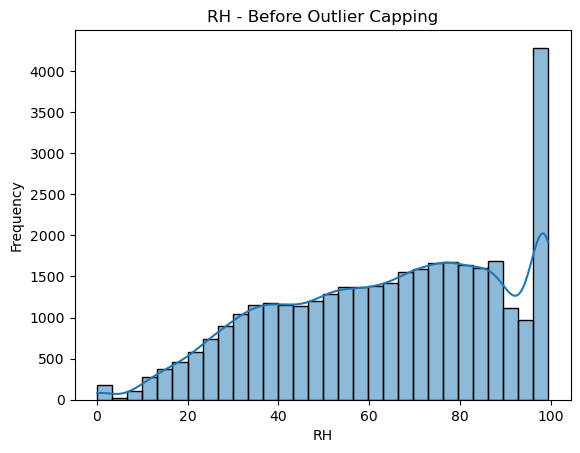

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


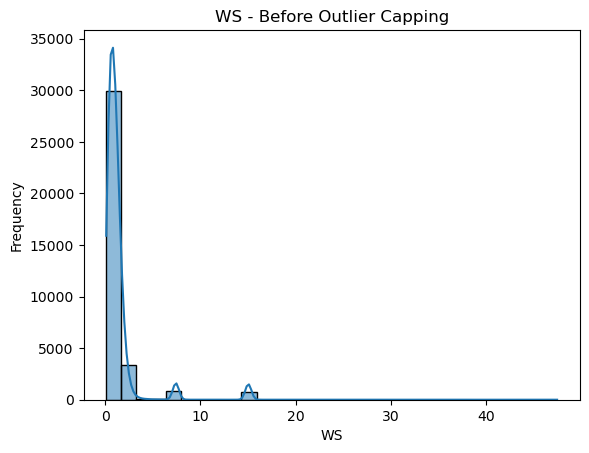

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


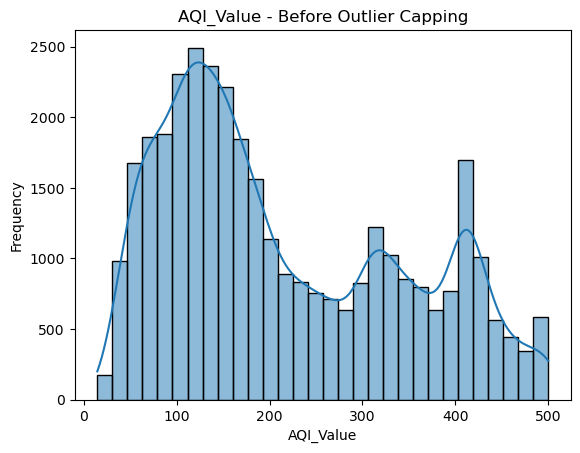

In [10]:
for col in df_num.columns:
    plt.figure()
    sns.histplot(df_num[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} - Before Outlier Capping")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


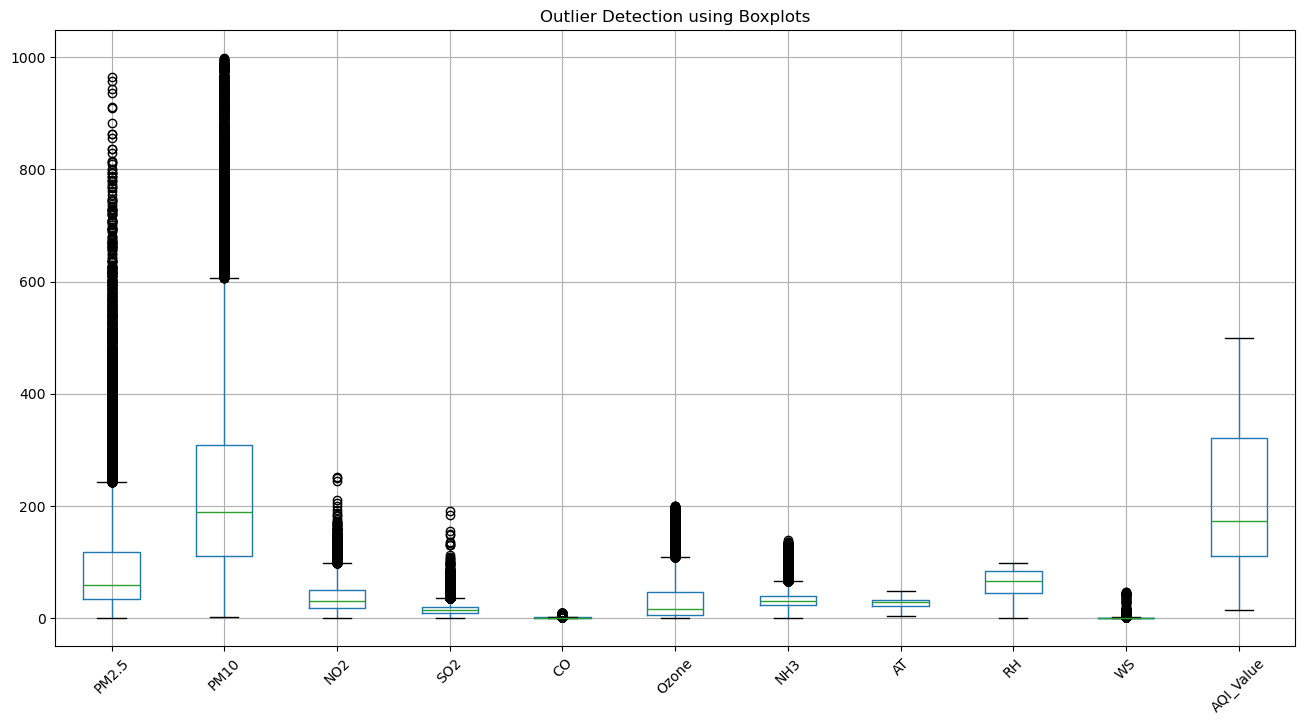

In [11]:
plt.figure(figsize=(16, 8))
df_num.boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()


In [12]:
outlier_summary = {}

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_num[(df_num[col] < lower) | (df_num[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary


{'PM2.5': 2909,
 'PM10': 1513,
 'NO2': 1125,
 'SO2': 1562,
 'CO': 3287,
 'Ozone': 2158,
 'NH3': 1355,
 'AT': 0,
 'RH': 0,
 'WS': 2065,
 'AQI_Value': 0}

# Outlier Treatment Using IQR Capping
Outliers are capped using the Interquartile Range (IQR) method to preserve data distribution while reducing extreme bias.


In [13]:
import numpy as np

num_cols = [
    "PM2.5", "PM10", "NO2", "SO2", "CO",
    "Ozone", "NH3", "AT", "RH", "WS"
]

df_capped = df_model.copy()

for col in num_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])


In [14]:
df_capped[num_cols].describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS
count,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000,35114.000000
mean,86.147998,227.881740,36.865040,15.663558,1.268338,31.071202,32.821437,26.878254,64.194880,1.022698
std,70.018543,152.000327,24.050621,8.254467,0.732970,32.925622,13.945347,8.125017,24.600792,0.633777
min,0.250000,3.000000,0.100000,0.100000,0.000000,0.100000,0.100000,4.300000,0.100000,0.100000
25%,34.750000,111.500000,18.150000,9.780000,0.780000,5.870000,23.380000,21.150000,45.000000,0.530000
50%,59.500000,189.750000,30.330000,14.100000,1.080000,16.250000,30.120000,28.350000,66.880000,0.900000
75%,118.000000,309.500000,50.280000,20.180000,1.600000,47.057500,40.578270,32.480000,84.700000,1.350000
max,242.875000,606.500000,98.475000,35.780000,2.830000,108.838750,66.375675,48.200000,99.450000,2.580000


In [15]:
(df_model["AQI_Value"] == df_capped["AQI_Value"]).all()


True

# Distribution Analysis After Outlier Treatment
Histograms with KDE are plotted to observe data normality and skewness after outlier treatment.


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


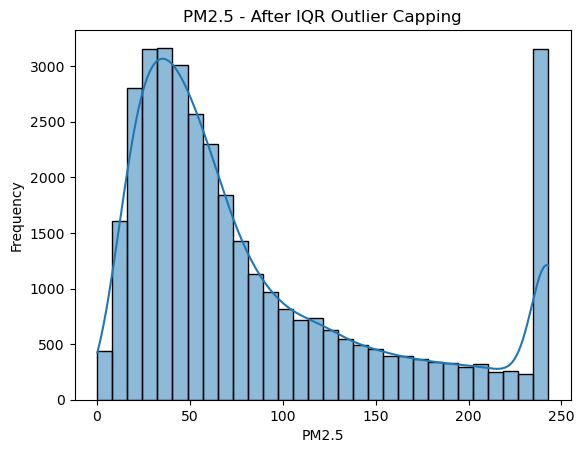

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


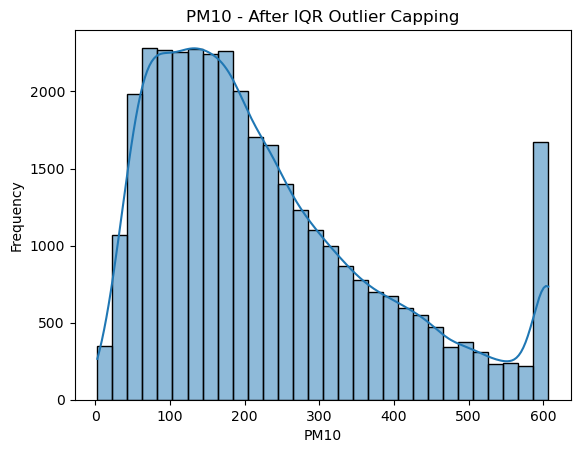

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


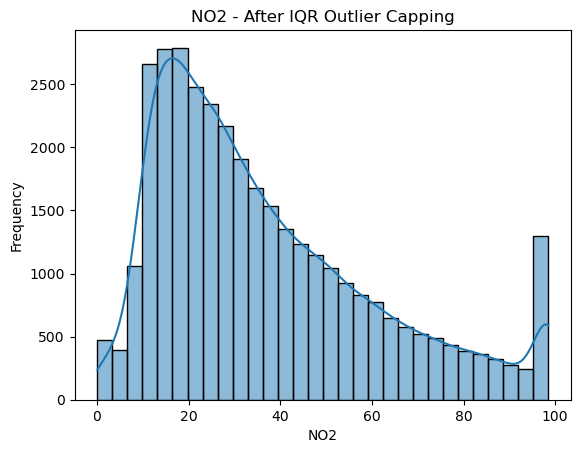

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


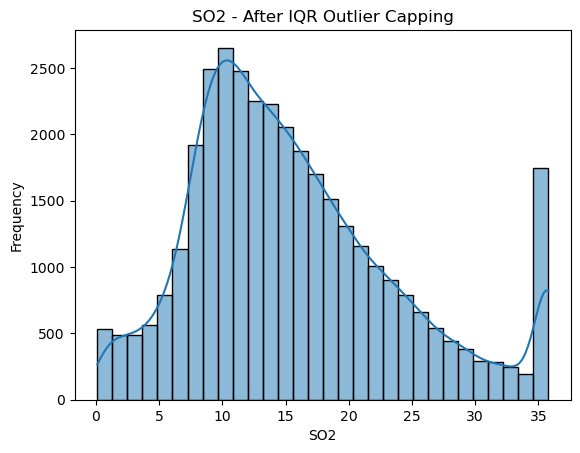

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


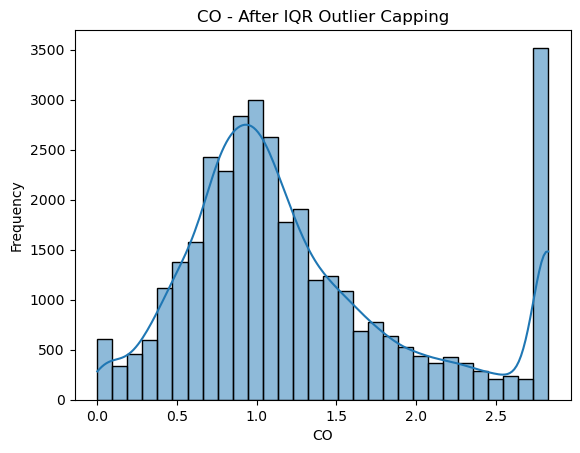

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


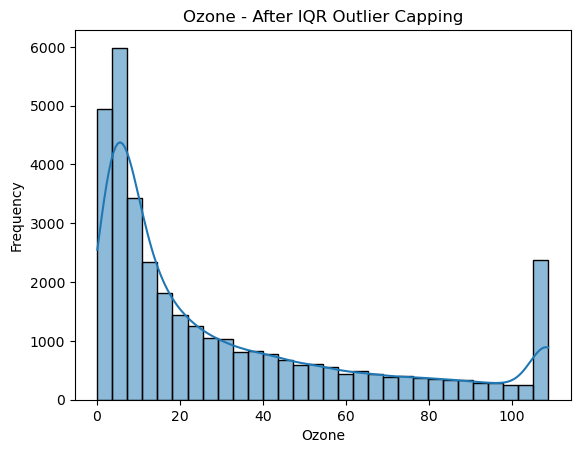

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


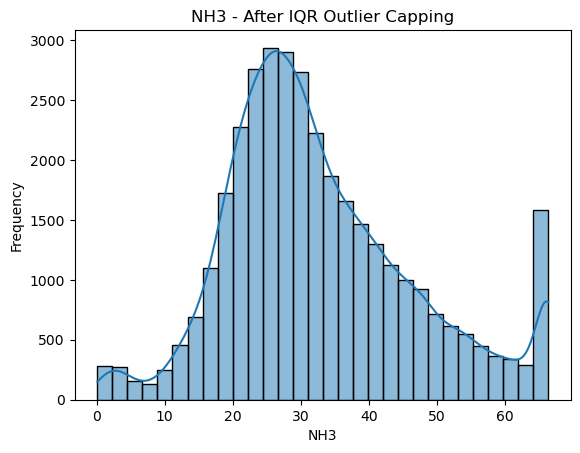

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


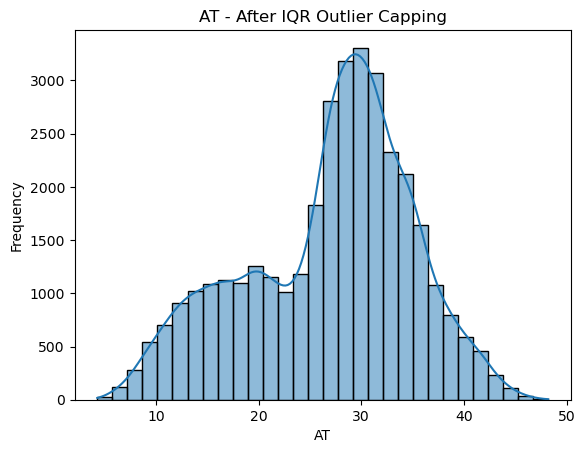

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


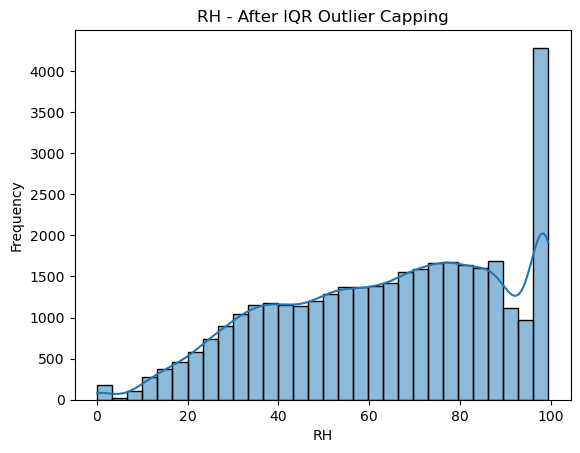

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


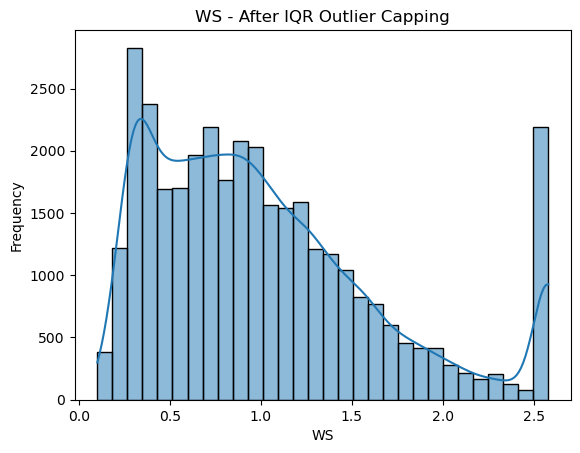

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    "PM2.5", "PM10", "NO2", "SO2", "CO",
    "Ozone", "NH3", "AT", "RH", "WS"
]

for col in num_cols:
    plt.figure()
    sns.histplot(df_capped[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} - After IQR Outlier Capping")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [17]:
outlier_summary_after = {}

for col in num_cols:  
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count any remaining outliers
    outliers = df_capped[(df_capped[col] < lower) | (df_capped[col] > upper)]
    outlier_summary_after[col] = len(outliers)

outlier_summary_after


{'PM2.5': 0,
 'PM10': 0,
 'NO2': 0,
 'SO2': 0,
 'CO': 0,
 'Ozone': 0,
 'NH3': 0,
 'AT': 0,
 'RH': 0,
 'WS': 0}

In [32]:
corr_cols = [
    "PM2.5", "PM10", "NO2", "SO2", "CO",
    "Ozone", "NH3", "AT", "RH", "WS",
    "AQI_Value"
]

correlation_matrix = df_capped[corr_cols].corr()

correlation_matrix


,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS,AQI_Value
PM2.5,1.000000,0.781529,0.444213,0.320723,0.600777,-0.196112,0.584805,-0.589684,0.103399,-0.291662,0.878507
PM10,0.781529,1.000000,0.431456,0.307185,0.568138,-0.104457,0.431810,-0.295091,-0.108180,-0.201412,0.944256
NO2,0.444213,0.431456,1.000000,0.450087,0.525123,-0.278533,0.282544,-0.361074,-0.024245,-0.359861,0.465165
SO2,0.320723,0.307185,0.450087,1.000000,0.248754,0.112492,0.153826,-0.188321,-0.226288,-0.233524,0.346387
CO,0.600777,0.568138,0.525123,0.248754,1.000000,-0.304749,0.446500,-0.431158,0.180332,-0.438951,0.576894
Ozone,-0.196112,-0.104457,-0.278533,0.112492,-0.304749,1.000000,-0.089190,0.451042,-0.540035,0.251304,-0.119530
NH3,0.584805,0.431810,0.282544,0.153826,0.446500,-0.089190,1.000000,-0.434347,0.139899,-0.139472,0.489260
AT,-0.589684,-0.295091,-0.361074,-0.188321,-0.431158,0.451042,-0.434347,1.000000,-0.542010,0.312936,-0.410978
RH,0.103399,-0.108180,-0.024245,-0.226288,0.180332,-0.540035,0.139899,-0.542010,1.000000,-0.186866,-0.067370
WS,-0.291662,-0.201412,-0.359861,-0.233524,-0.438951,0.251304,-0.139472,0.312936,-0.186866,1.000000,-0.234941


# Train-Test Splitting
The dataset is divided into training and testing sets to evaluate model generalization.


In [18]:
feature_cols = [
    "PM2.5", "PM10", "NO2", "SO2", "CO",
    "Ozone", "NH3", "AT", "RH", "WS"
]

X = df_capped[feature_cols]
y = df_capped["AQI_Value"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(28091, 10) (7023, 10)


# Feature Scaling
Numerical features are normalized using StandardScaler to ensure uniform feature scaling for distance-based models.


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training – Linear Regression
Linear Regression is used as the baseline regression model for AQI prediction.


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


LINEAR REGRESSION RESULTS
MAE : 21.784850024744642
RMSE: 30.356054774663686
R2  : 0.9434552300313941


# Model Training – Random Forest Regressor
Random Forest is used as an ensemble-based non-linear regressor for improved accuracy.


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RANDOM FOREST RESULTS")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R2  :", r2_rf)


RANDOM FOREST RESULTS
MAE : 2.1928741841781996
RMSE: 7.558704143634006
R2  : 0.9964941245776833


# Model Training – Gradient Boosting Regressor
Gradient Boosting is applied for high-performance ensemble regression.


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("GRADIENT BOOSTING RESULTS")
print("MAE :", mae_gbr)
print("RMSE:", rmse_gbr)
print("R2  :", r2_gbr)


GRADIENT BOOSTING RESULTS
MAE : 5.8787590888118
RMSE: 11.175112395708565
R2  : 0.9923368807185284


# Model Training – Support Vector Regressor (SVR)
SVR with RBF kernel is used to capture non-linear relationships in air pollution data.


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("SUPPORT VECTOR REGRESSION RESULTS")
print("MAE :", mae_svr)
print("RMSE:", rmse_svr)
print("R2  :", r2_svr)


SUPPORT VECTOR REGRESSION RESULTS
MAE : 8.235993618142247
RMSE: 14.15929770704579
R2  : 0.987697731190142


# Model Training – KNN Regressor
K-Nearest Neighbors regression is applied to capture local neighborhood patterns.


In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7, weights="distance")

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN REGRESSION RESULTS")
print("MAE :", mae_knn)
print("RMSE:", rmse_knn)
print("R2  :", r2_knn)


KNN REGRESSION RESULTS
MAE : 14.186781596576902
RMSE: 20.623832919485896
R2  : 0.9738999974742946


# Model Training – AdaBoost Regressor
AdaBoost is implemented to boost regression performance using weighted ensemble learning.


In [28]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state=42)
abr.fit(X_train, y_train)

y_pred_abr = abr.predict(X_test)

mae_abr = mean_absolute_error(y_test, y_pred_abr)
rmse_abr = np.sqrt(mean_squared_error(y_test, y_pred_abr))
r2_abr = r2_score(y_test, y_pred_abr)

print("ADABOOST RESULTS")
print("MAE :", mae_abr)
print("RMSE:", rmse_abr)
print("R2  :", r2_abr)


ADABOOST RESULTS
MAE : 21.900479838144225
RMSE: 27.23204216587681
R2  : 0.9544946763289563


# Model Performance Comparison
All trained models are compared using MAE, RMSE, and R² Score to identify the best-performing AQI prediction model.


In [29]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "KNN Regressor",
        "Support Vector Regressor (SVR)",
        "AdaBoost Regressor",
        "Gradient Boosting Regressor",
        "Random Forest Regressor"
    ],
    
    "MAE": [
        mae_lr,
        mae_knn,
        mae_svr,
        mae_abr,
        mae_gbr,
        mae_rf
    ],
    
    "RMSE": [
        rmse_lr,
        rmse_knn,
        rmse_svr,
        rmse_abr,
        rmse_gbr,
        rmse_rf
    ],
    
    "R2_Score": [
        r2_lr,
        r2_knn,
        r2_svr,
        r2_abr,
        r2_gbr,
        r2_rf
    ]
})

# Sort by best R2 score
results_df = results_df.sort_values(by="R2_Score", ascending=False)

results_df


,Model,MAE,RMSE,R2_Score
5,Random Forest Regressor,2.192874,7.558704,0.996494
4,Gradient Boosting Regressor,5.878759,11.175112,0.992337
2,Support Vector Regressor (SVR),8.235994,14.159298,0.987698
1,KNN Regressor,14.186782,20.623833,0.973900
3,AdaBoost Regressor,21.900480,27.232042,0.954495
0,Linear Regression,21.784850,30.356055,0.943455


In [30]:
best_model = results_df.iloc[0]
best_model


Model       Random Forest Regressor
MAE                        2.192874
RMSE                       7.558704
R2_Score                   0.996494
Name: 5, dtype: object

# Feature Importance Analysis
The most influential pollutants affecting AQI are identified using Random Forest feature importance.


In [23]:
feature_importance = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
1,PM10,0.842914
0,PM2.5,0.150098
5,Ozone,0.002298
4,CO,0.001109
2,NO2,0.000907
7,AT,0.000707
8,RH,0.000570
3,SO2,0.000511
6,NH3,0.000474
9,WS,0.000411


# Saving the Best Performing Model
The trained Random Forest model and scaler are saved for future AQI predictions.


In [24]:
import joblib

joblib.dump(rf, "AQI_RandomForest_Model.pkl")
joblib.dump(scaler, "AQI_Scaler.pkl")


['AQI_Scaler.pkl']

In [31]:
results_df.to_csv("AQI_Model_Comparison.csv", index=False)


In [34]:
aqi_corr = correlation_matrix["AQI_Value"].sort_values(ascending=False)

aqi_corr


AQI_Value    1.000000
PM10         0.944256
PM2.5        0.878507
CO           0.576894
NH3          0.489260
NO2          0.465165
SO2          0.346387
RH          -0.067370
Ozone       -0.119530
WS          -0.234941
AT          -0.410978
Name: AQI_Value, dtype: float64

In [35]:
# Correlation analysis was performed between all features and AQI to support feature selection. PM10 (0.944) and PM2.5 (0.879) showed the strongest positive correlation with AQI, confirming their dominant influence on air pollution levels. Moderate positive correlations were observed for CO (0.577), NH3 (0.489), NO2 (0.465), and SO2 (0.346), indicating their contributory role in AQI formation. Meteorological parameters such as temperature (−0.410) and wind speed (−0.235) exhibited negative correlations, reflecting their pollutant-dispersion effects. Based on this statistical and environmental relevance, all ten selected features were retained for model training.

# Real-World AQI Validation Using Live Data
Real-world air quality data is used to test and validate the trained ML model predictions against actual pollution conditions.


In [36]:
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("AQI_RandomForest_Model.pkl")
scaler = joblib.load("AQI_Scaler.pkl")


In [37]:
def cpcb_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"


In [38]:
def predict_aqi_rf(
    PM25, PM10, NO2, SO2, CO,
    Ozone, NH3, AT, RH, WS
):
    import numpy as np
    
    new_sample = np.array([[PM25, PM10, NO2, SO2, CO,
                             Ozone, NH3, AT, RH, WS]])
    
    predicted_aqi = rf.predict(new_sample)[0]
    predicted_aqi = round(float(predicted_aqi), 2)
    
    return predicted_aqi


In [39]:
aqi = predict_aqi_rf(92, 210, 35, 11, 0.7, 65, 22, 32, 58, 2.4)
category = cpcb_aqi_category(aqi)

print("Predicted AQI:", aqi)
print("AQI Category:", category)


Predicted AQI: 204.41
AQI Category: Poor


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
#For a sample input with PM2.5 = 92 µg/m³ and PM10 = 210 µg/m³, the deployed Random Forest model predicted an AQI of 204.41, which falls under the ‘Poor’ category as per CPCB standards.

In [41]:
import pandas as pd

# Create test cases DataFrame
test_df = pd.DataFrame({
    "Condition": ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"],
    "PM2.5": [18, 38, 65, 92, 180, 320],
    "PM10": [40, 85, 145, 210, 380, 620],
    "NO2": [12, 20, 32, 35, 60, 110],
    "SO2": [5, 9, 14, 11, 22, 45],
    "CO": [0.3, 0.5, 0.9, 0.7, 1.8, 3.5],
    "Ozone": [20, 35, 55, 65, 90, 130],
    "NH3": [8, 15, 25, 22, 45, 70],
    "AT": [26, 28, 30, 32, 18, 14],
    "RH": [55, 60, 58, 58, 70, 85],
    "WS": [4.5, 3.2, 2.0, 2.4, 0.9, 0.4]
})

test_df


,Condition,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS
0,Good,18,40,12,5,0.3,20,8,26,55,4.5
1,Satisfactory,38,85,20,9,0.5,35,15,28,60,3.2
2,Moderate,65,145,32,14,0.9,55,25,30,58,2.0
3,Poor,92,210,35,11,0.7,65,22,32,58,2.4
4,Very Poor,180,380,60,22,1.8,90,45,18,70,0.9
5,Severe,320,620,110,45,3.5,130,70,14,85,0.4


In [42]:
predicted_aqi_list = []
predicted_category_list = []

for _, row in test_df.iterrows():
    aqi = predict_aqi_rf(
        row["PM2.5"], row["PM10"], row["NO2"], row["SO2"],
        row["CO"], row["Ozone"], row["NH3"],
        row["AT"], row["RH"], row["WS"]
    )
    
    category = cpcb_aqi_category(aqi)
    
    predicted_aqi_list.append(aqi)
    predicted_category_list.append(category)

# predictions to DataFrame
test_df["Predicted_AQI"] = predicted_aqi_list
test_df["Predicted_Category"] = predicted_category_list

test_df


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with f

,Condition,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS,Predicted_AQI,Predicted_Category
0,Good,18,40,12,5,0.3,20,8,26,55,4.5,40.11,Good
1,Satisfactory,38,85,20,9,0.5,35,15,28,60,3.2,85.04,Satisfactory
2,Moderate,65,145,32,14,0.9,55,25,30,58,2.0,130.23,Moderate
3,Poor,92,210,35,11,0.7,65,22,32,58,2.4,204.41,Poor
4,Very Poor,180,380,60,22,1.8,90,45,18,70,0.9,346.27,Very Poor
5,Severe,320,620,110,45,3.5,130,70,14,85,0.4,484.22,Severe


# Real-World AQI Testing Using Sample City Data

In this section, real-world and assumed air quality parameters for selected Indian cities (Pathanamthitta, Bengaluru, and New Delhi) are organized into a structured DataFrame. These values represent practical pollution scenarios and will be used to test the trained machine learning model for AQI prediction and CPCB-based air quality classification.


In [43]:
import pandas as pd

real_assumed_test_df = pd.DataFrame({
    "City": ["Pathanamthitta", "Bengaluru", "New Delhi"],
    
    "PM2.5": [24, 22, 280],
    "PM10": [45, 69, 370],
    "NO2": [15, 22, 75],
    "SO2": [8, 10, 32],
    "CO": [0.4, 0.5, 2.2],
    "Ozone": [28, 35, 90],
    "NH3": [10, 15, 48],
    "AT": [32, 27, 16],
    "RH": [70, 65, 65],
    "WS": [1.5, 2.2, 1.1]
})

real_assumed_test_df


,City,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS
0,Pathanamthitta,24,45,15,8,0.4,28,10,32,70,1.5
1,Bengaluru,22,69,22,10,0.5,35,15,27,65,2.2
2,New Delhi,280,370,75,32,2.2,90,48,16,65,1.1


In [44]:
predicted_aqi_list = []
predicted_category_list = []

for _, row in real_assumed_test_df.iterrows():
    aqi = predict_aqi_rf(
        row["PM2.5"], row["PM10"], row["NO2"], row["SO2"],
        row["CO"], row["Ozone"], row["NH3"],
        row["AT"], row["RH"], row["WS"]
    )
    
    category = cpcb_aqi_category(aqi)
    
    predicted_aqi_list.append(aqi)
    predicted_category_list.append(category)

real_assumed_test_df["Predicted_AQI"] = predicted_aqi_list
real_assumed_test_df["Predicted_Category"] = predicted_category_list

real_assumed_test_df


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,City,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,AT,RH,WS,Predicted_AQI,Predicted_Category
0,Pathanamthitta,24,45,15,8,0.4,28,10,32,70,1.5,45.10,Good
1,Bengaluru,22,69,22,10,0.5,35,15,27,65,2.2,69.11,Satisfactory
2,New Delhi,280,370,75,32,2.2,90,48,16,65,1.1,409.05,Severe


In [45]:
# PM2.5 and PM10 values were sourced from publicly available Indian air-quality dashboards that aggregate CPCB monitoring data. Since CPCB does not publicly release real-time city-level concentrations for all gaseous pollutants and meteorological parameters, the remaining features (NO2, SO2, CO, Ozone, NH3, temperature, humidity, and wind speed) were populated using realistic baseline values derived from the statistical distribution of the training dataset. This hybrid real–assumed testing approach enables practical real-world validation while maintaining scientific consistency.

# Real-Time AQI Prediction System (User Input)
This interactive system allows users to enter real-world air pollutant concentrations and receive AQI predictions and CPCB-based AQI category.


In [ ]:
import joblib

rf = joblib.load("AQI_RandomForest_Model.pkl")

print(" Random Forest model loaded successfully!")


In [99]:
def cpcb_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"


In [113]:
def user_aqi_prediction():

    print("\nENTER AIR QUALITY PARAMETERS (CPCB UNITS)")
    print("--------------------------------------------------")

    PM25 = float(input("Enter PM2.5 (µg/m³): "))
    PM10 = float(input("Enter PM10 (µg/m³): "))
    NO2  = float(input("Enter NO2 (µg/m³): "))
    SO2  = float(input("Enter SO2 (µg/m³): "))
    CO   = float(input("Enter CO (mg/m³): "))
    Ozone = float(input("Enter Ozone (µg/m³): "))
    NH3  = float(input("Enter NH3 (µg/m³): "))

    print("\nENTER METEOROLOGICAL PARAMETERS")
    print("--------------------------------------------------")

    AT = float(input("Enter Ambient Temperature (°C): "))
    RH = float(input("Enter Relative Humidity (%): "))
    WS = float(input("Enter Wind Speed (m/s): "))

    # DataFrame with correct column names
    user_input_df = pd.DataFrame(
        [[PM25, PM10, NO2, SO2, CO, Ozone, NH3, AT, RH, WS]],
        columns=["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "NH3", "AT", "RH", "WS"]
    )

    # Predict AQI
    predicted_aqi = rf.predict(user_input_df)[0]
    predicted_aqi = round(float(predicted_aqi), 2)

    # CPCB Category
    category = cpcb_aqi_category(predicted_aqi)

    print("\nPREDICTION RESULT")
    print("--------------------------------------------------")
    print(f"Predicted AQI Value  : {predicted_aqi}")
    print(f"AQI Category        : {category}")


In [119]:
user_aqi_prediction()


ENTER AIR QUALITY PARAMETERS (CPCB UNITS)
--------------------------------------------------
Enter PM2.5 (µg/m³): 129
Enter PM10 (µg/m³): 212
Enter NO2 (µg/m³): 0
Enter SO2 (µg/m³): 0
Enter CO (mg/m³): 0
Enter Ozone (µg/m³): 0
Enter NH3 (µg/m³): 0

ENTER METEOROLOGICAL PARAMETERS
--------------------------------------------------
Enter Ambient Temperature (°C): 17
Enter Relative Humidity (%): 22
Enter Wind Speed (m/s): 3.3

PREDICTION RESULT
--------------------------------------------------
Predicted AQI Value  : 307.1
AQI Category        : Very Poor


# Conclusion
The Random Forest Regressor achieved the best performance with high R² score and low prediction error. The model successfully predicts AQI values using real-world pollutant and meteorological parameters and classifies air quality based on CPCB standards.

This system demonstrates the potential of machine learning in environmental monitoring and can be extended into real-time pollution tracking applications.


# PART B — AQI TIME-SERIES FORECASTING (NEXT-HOUR / FUTURE AQI) (Delhi)

In this section, a true time-series forecasting model that predicts 
future AQI directly from historical pollution trends, meteorological variables,
and temporal lag features—without requiring future pollutant values as input.

The forecasting model is validated using real unseen future data and supports interactive station-wise user input for real-time AQI prediction and error analysis.


# Forecasting Objective

While Part A estimates AQI using known pollutant values, this section focuses on
forecasting **future AQI** using only past observations.

Target:
- Predict AQI at time **T+1 hour** (next-hour AQI)

This simulates real-world AQI alert and early warning systems.


In [3]:
import pandas as pd

# 1. Dataset Loading & Initial Inspection

In this section, the AQI dataset is loaded and examined to understand its structure, features, and overall quality before preprocessing.


In [4]:
df = pd.read_csv('Delhi_3Stations_With_AQI_CLEAN.csv')
df.head()

,Unnamed: 0,PM2.5,year,month,day,hour,PM10,AT,BP,SR,...,PM10_sub,NO2_sub,SO2_sub,CO_sub,O3_sub,NH3_sub,AQI_Value,AQI_Category,Expected_Category,Recomputed_AQI
0,0,77.0,2018,6,1,0,274.0,34.51,975.17,2.00,...,224.000000,29.2000,13.6625,26.5,98.13,10.750,224.000000,Poor,Poor,224.000000
1,1,75.0,2018,6,1,1,237.0,34.05,976.08,2.00,...,191.362416,27.1375,11.8500,25.5,97.80,11.955,191.362416,Moderate,Moderate,191.362416
2,2,81.0,2018,6,1,2,219.0,33.12,991.25,2.00,...,179.402685,14.8750,2.1000,6.0,46.27,2.660,179.402685,Moderate,Moderate,179.402685
3,3,70.0,2018,6,1,3,217.0,32.54,998.50,2.00,...,178.073825,13.3750,3.7125,15.0,35.88,3.360,178.073825,Moderate,Moderate,178.073825
4,4,74.0,2018,6,1,4,226.0,31.93,997.90,2.08,...,184.053691,40.6125,3.4125,19.5,26.55,2.120,184.053691,Moderate,Moderate,184.053691


# 2. Datetime Processing & Station-Level Sorting

The dataset contains separate columns for year, month, day, and hour. These are combined into a single Datetime index. The data is then sorted by Station and Datetime to preserve temporal order for time-series forecasting.


In [5]:
df["Datetime"] = pd.to_datetime(df[["year","month","day","hour"]])
df = df.sort_values("Datetime")
df = df.set_index("Datetime")


In [10]:
df.columns

Index(['Unnamed: 0', 'PM2.5', 'year', 'month', 'day', 'hour', 'PM10', 'AT',
       'BP', 'SR', 'RH', 'WS', 'WD', 'NO', 'NO2', 'SO2', 'Ozone', 'CO',
       'Benzene', 'NH3', 'NOx', 'Station', 'PM25_sub', 'PM10_sub', 'NO2_sub',
       'SO2_sub', 'CO_sub', 'O3_sub', 'NH3_sub', 'AQI_Value', 'AQI_Category',
       'Expected_Category', 'Recomputed_AQI', 'Target_AQI_Next_Hour'],
      dtype='object')

In [11]:
df[["Station", "AQI_Value"]].head()


,Station,AQI_Value
Datetime,,
2018-06-01 00:00:00,Ashok Vihar,224.000000
2018-06-01 01:00:00,Ashok Vihar,191.362416
2018-06-01 02:00:00,Ashok Vihar,179.402685
2018-06-01 03:00:00,Ashok Vihar,178.073825
2018-06-01 04:00:00,Ashok Vihar,184.053691


# 3. Next-Hour AQI Target Generation

The forecasting target is created by shifting the real AQI values by one hour forward within each station. This ensures that each row learns to predict the true AQI of the next hour.


In [12]:
df["Target_AQI_Next_Hour"] = (
    df.groupby("Station")["AQI_Value"].shift(-1)
)


# 4. Temporal Lag Feature Engineering

Lag-based features are created to provide the model with memory of past pollution levels. These include 1-hour and 24-hour lag values for AQI and PM2.5 concentrations.


In [13]:
df["AQI_lag1"]  = df.groupby("Station")["AQI_Value"].shift(1)
df["AQI_lag24"] = df.groupby("Station")["AQI_Value"].shift(24)

df["PM2.5_lag1"]  = df.groupby("Station")["PM2.5"].shift(1)
df["PM2.5_lag24"] = df.groupby("Station")["PM2.5"].shift(24)


# 5. Handling Missing Values After Lag Feature Creation

Since lag features introduce missing values at the beginning of each station’s time series, these rows are removed to ensure clean supervised learning.


In [14]:
df = df.dropna()


In [15]:
df[["Station", "AQI_Value", "Target_AQI_Next_Hour"]].head(10)


,Station,AQI_Value,Target_AQI_Next_Hour
Datetime,,,
2018-06-02 00:00:00,Ashok Vihar,133.557047,109.471476
2018-06-02 01:00:00,Ashok Vihar,109.471476,100.000000
2018-06-02 02:00:00,Ashok Vihar,100.000000,85.250000
2018-06-02 03:00:00,Ashok Vihar,85.250000,74.830000
2018-06-02 04:00:00,Ashok Vihar,74.830000,78.580000
2018-06-02 05:00:00,Ashok Vihar,78.580000,89.080000
2018-06-02 06:00:00,Ashok Vihar,89.080000,116.228725
2018-06-02 07:00:00,Ashok Vihar,116.228725,115.836711
2018-06-02 08:00:00,Ashok Vihar,115.836711,125.969262


# 6. Feature Selection for the Forecasting Model

This section defines the final feature set used for training the AQI forecasting model, including pollutant levels, meteorological variables, time-based features, and temporal lag variables.


In [16]:
features = [
    "PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone",
    "AT", "BP", "RH", "WS", "WD",
    "year", "month", "day", "hour",
    "AQI_lag1", "AQI_lag24",
    "PM2.5_lag1", "PM2.5_lag24"
]

X = df[features]
y = df["Target_AQI_Next_Hour"]

print(X.shape, y.shape)


(35039, 19) (35039,)


# 7. Time-Based Train–Test Split

The dataset is split into training and testing sets using a time-ordered 80:20 split. This prevents future data leakage and ensures realistic simulation of real-world forecasting.


In [17]:
split_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (28031, 19) (28031,)
Test shape: (7008, 19) (7008,)


# 8. Training the Next-Hour AQI Forecasting Model

A Gradient Boosting Regressor is trained on the historical data to learn complex non-linear relationships between pollution, weather, time, and future AQI values.


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

forecast_model = GradientBoostingRegressor(random_state=42)
forecast_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 9. Forecasting Next-Hour AQI on Unseen Test Data

The trained model is used to generate next-hour AQI predictions for the held-out future test dataset.


In [19]:
y_pred = forecast_model.predict(X_test)


# 10. Forecasting Performance Evaluation

The model is evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score to assess numerical forecasting accuracy.


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("Forecast MAE:", mae)
print("Forecast RMSE:", rmse)
print("Forecast R2:", r2)


Forecast MAE: 20.971667906951012
Forecast RMSE: 33.087647354372656
Forecast R2: 0.9241627831031275


In [41]:
import joblib

# Save model
joblib.dump(forecast_model, "aqi_next_hour_forecast_model.pkl")

#save the feature list
joblib.dump(features, "aqi_forecast_features.pkl")


['aqi_forecast_features.pkl']

# 11. Visual Comparison of Actual vs Predicted Next-Hour AQI

A time-series plot is generated to visually compare the predicted AQI against the actual AQI values over the test period.


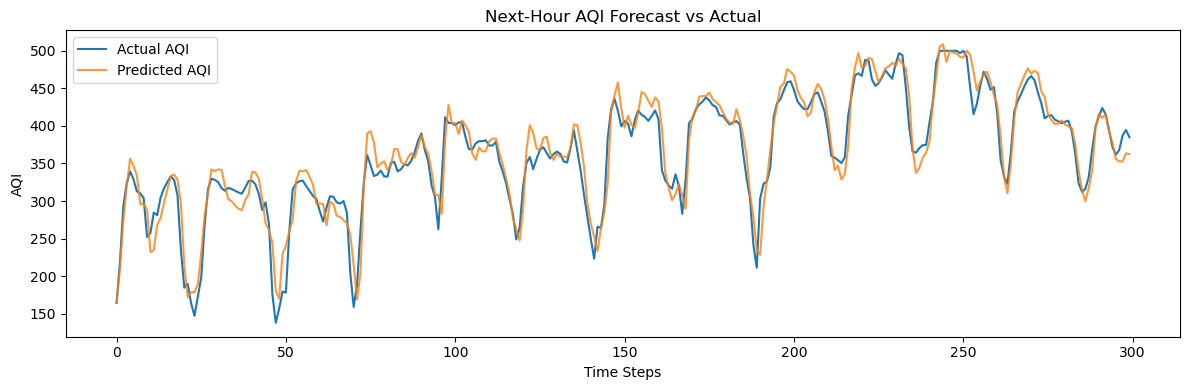

In [21]:
import matplotlib.pyplot as plt

sample = y_test.iloc[:300]

plt.figure(figsize=(12,4))
plt.plot(sample.values, label="Actual AQI")
plt.plot(y_pred[:300], label="Predicted AQI", alpha=0.8)
plt.legend()
plt.title("Next-Hour AQI Forecast vs Actual")
plt.ylabel("AQI")
plt.xlabel("Time Steps")
plt.tight_layout()
plt.show()


In [24]:
X_test_with_meta = df.loc[X_test.index].copy()


# 12. CPCB AQI Category Conversion & Forecast Category Accuracy Evaluation

Predicted AQI values are converted into CPCB pollution categories such as Good, Moderate, Poor, Very Poor, and Severe to enable policy-relevant analysis.

The accuracy of AQI category prediction is evaluated by comparing the predicted categories with the actual recorded categories.


In [28]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

results["Actual_Category"] = results["Actual_AQI_Next_Hour"].apply(aqi_category)
results["Predicted_Category"] = results["Predicted_AQI_Next_Hour"].apply(aqi_category)

from sklearn.metrics import accuracy_score
category_accuracy = accuracy_score(
    results["Actual_Category"],
    results["Predicted_Category"]
)

print("Forecast Category Accuracy:", category_accuracy)


Forecast Category Accuracy: 0.761843607305936


# 13. Station-Wise Forecast Result Verification

A detailed verification table is created to compare predicted and actual next-hour AQI values along with station names and timestamps.


In [27]:
import numpy as np

# Positions of test rows in the original df
test_pos = np.arange(split_idx, len(X))   # same split

# Get the corresponding rows from df (with Station + Datetime)
df_test_meta = df.iloc[test_pos].copy()

# Build results table
results = df_test_meta[["Station"]].copy()
results["Datetime"] = df_test_meta.index

results["Actual_AQI_Next_Hour"] = y_test.values     
results["Predicted_AQI_Next_Hour"] = y_pred          

# Check first 10 rows
results[["Datetime", "Station", "Actual_AQI_Next_Hour", "Predicted_AQI_Next_Hour"]].head(10)


,Datetime,Station,Actual_AQI_Next_Hour,Predicted_AQI_Next_Hour
Datetime,,,,
2018-12-13 16:00:00,2018-12-13 16:00:00,Okhla,164.155172,164.501757
2018-12-13 17:00:00,2018-12-13 17:00:00,Okhla,218.068965,209.601533
2018-12-13 18:00:00,2018-12-13 18:00:00,Okhla,293.172414,274.493607
2018-12-13 19:00:00,2018-12-13 19:00:00,Okhla,323.639535,319.295727
2018-12-13 20:00:00,2018-12-13 20:00:00,Okhla,339.372093,356.457013
2018-12-13 21:00:00,2018-12-13 21:00:00,Okhla,329.011628,346.936435
2018-12-13 22:00:00,2018-12-13 22:00:00,Okhla,312.895349,334.196407
2018-12-13 23:00:00,2018-12-13 23:00:00,Okhla,310.209302,295.571380
2018-12-14 00:00:00,2018-12-14 00:00:00,Okhla,304.069767,296.667844


# 15. Interactive Next-Hour AQI Forecast System (User Input)

This section provides a user-driven forecasting system where users can enter a station, date, and time to obtain next-hour AQI predictions and real-time validation against actual recorded values.


In [37]:
def user_forecast_with_validation():
    print("\n==========  DATASET LIMITS ==========")
    print("Available Stations:")
    print(df["Station"].unique())

    print("\nValid Time Range:")
    print("From:", df.index.min())
    print("To  :", df.index.max())
    
    print("\n Time must be in HH:MM format (hourly only, e.g., 19:00)")
    print("======================================")

    # --- USER INPUT ---
    station = input("\nEnter Station Name (exactly as above): ").strip()
    date_str = input("Enter Date (YYYY-MM-DD): ").strip()
    time_str = input("Enter Time (HH:MM): ").strip()

    try:
        full_time_str = f"{date_str} {time_str}:00"
        time = pd.to_datetime(full_time_str)

        # Check date-time within dataset range
        if time < df.index.min() or time > df.index.max():
            print("\n Time is outside the dataset range.")
            print("Valid range is:")
            print(df.index.min(), "to", df.index.max())
            return

        pred = predict_next_hour_for_station_at_time(station, full_time_str)

        if isinstance(pred, str):
            print("\n", pred)
            return

        base_time = pred["base_datetime"]
        forecast_time = pred["forecast_datetime"]

        actual_next = df.loc[
            (df["Station"] == station) &
            (df.index == forecast_time),
            "AQI_Value"
        ].iloc[0]

        error = actual_next - pred["predicted_next_hour_aqi"]

        print("\n==========  AQI FORECAST RESULT ==========")
        print("Station:", station)
        print("Base Time:", base_time)
        print("Forecast Time (T+1 hour):", forecast_time)


        print("\nPredicted Next-Hour AQI:", round(pred["predicted_next_hour_aqi"], 2))
        print("Predicted Category:", pred["predicted_next_hour_category"])

        print("\nActual Next-Hour AQI:", round(actual_next, 2))
        print("Actual Category:", aqi_category(actual_next))

        print("\nForecast Error:", round(error, 2))
        print("==========================================")

    except Exception as e:
        print("\n Invalid input format.")
        print("Use exactly this format:")
        print("Date: YYYY-MM-DD  → Example: 2018-12-13")
        print("Time: HH:MM       → Example: 19:00")
        print("Error Details:", e)


In [42]:
user_forecast_with_validation()



==========  DATASET LIMITS ==========
Available Stations:
['Ashok Vihar' 'Dwarka Sec-8' 'Okhla']

Valid Time Range:
From: 2018-06-02 00:00:00
To  : 2019-10-01 15:00:00

 Time must be in HH:MM format (hourly only, e.g., 19:00)

Enter Station Name (exactly as above): Okhla
Enter Date (YYYY-MM-DD): 2018-12-25
Enter Time (HH:MM): 23:00

==========  AQI FORECAST RESULT ==========
Station: Okhla
Base Time: 2018-12-25 23:00:00
Forecast Time: 2018-12-26 00:00:00

Predicted Next-Hour AQI: 356.1
Predicted Category: Very Poor

Actual Next-Hour AQI: 361.63
Actual Category: Very Poor

Forecast Error: 5.52


# 16. Project Scope & Forecasting Limitations

This forecasting system is designed for short-term AQI prediction at three Delhi monitoring stations. The model is most reliable for next-hour prediction and limited to historical patterns learned from 2018–2019 data.


# 17. Final Conclusion

This project successfully demonstrates a complete machine learning pipeline for AQI estimation and next-hour forecasting using real-world environmental sensor data. The system integrates temporal feature engineering, supervised time-series learning, rigorous performance evaluation, and interactive user validation to deliver a production-style air quality forecasting solution.
